# Deep Learning Term Project for ECG (DIL700)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
import pickle
import json
from keras.models import model_from_json
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset MIT-BIH

Collect all the data from the csv files

In [2]:
# # Original data

# train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
# test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

# Synthetic data

train_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_train.csv')
train_df = train_df.iloc[:, :-1]
train_df.rename(columns={'class': 187}, inplace=True)
test_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_test.csv')
test_df = test_df.iloc[:, :-1]
test_df.rename(columns={'class': 187}, inplace=True)

In [3]:
train_df = train_df[train_df[187] != 3]
test_df = test_df[test_df[187] != 3]

train_df = train_df[train_df[187] != '3.0']
test_df = test_df[test_df[187] != '3.0']

train_df = train_df[train_df[187] != 'class']
test_df = test_df[test_df[187] != 'class']

train_df.loc[train_df[187] == 4, 187] = 3.0
test_df.loc[test_df[187] == 4, 187] = 3.0

train_df.loc[train_df[187] == '4.0', 187] = 3.0
test_df.loc[test_df[187] == '4.0', 187] = 3.0

train_df.loc[train_df[187] == '0.0', 187] = 0.0
train_df.loc[train_df[187] == '1.0', 187] = 1.0
train_df.loc[train_df[187] == '2.0', 187] = 2.0
train_df.loc[train_df[187] == '3.0', 187] = 3.0

test_df.loc[test_df[187] == '0.0', 187] = 0.0
test_df.loc[test_df[187] == '1.0', 187] = 1.0
test_df.loc[test_df[187] == '2.0', 187] = 2.0
test_df.loc[test_df[187] == '3.0', 187] = 3.0

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.773913,0.142029,0.057971,0.130435,0.217391,0.220290,0.263768,0.255072,0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.824490,0.208163,0.048980,0.089796,0.122449,0.106122,0.130612,0.183673,0.167347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.879518,0.812048,0.115663,0.000000,0.130120,0.180723,0.183133,0.200000,0.197590,0.202410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.968432,0.735234,0.344196,0.153768,0.161914,0.130346,0.113035,0.114053,0.120163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.804800,0.704000,0.574400,0.416000,0.257600,0.145600,0.072000,0.057600,0.083200,0.176000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96369,1.000000,0.922535,0.371479,0.026408,0.061620,0.065141,0.040493,0.040493,0.029930,0.026408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96370,1.000000,0.835079,0.316754,0.047120,0.068063,0.073298,0.031414,0.000000,0.002618,0.015707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96371,0.028497,0.168394,0.207254,0.256477,0.375648,0.515544,0.559586,0.528497,0.528497,0.551813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
96372,1.000000,0.942396,0.748848,0.626728,0.592166,0.569124,0.533410,0.505760,0.487327,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
full_df=pd.concat([train_df,test_df],ignore_index=True)
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.773913,0.142029,0.057971,0.130435,0.217391,0.220290,0.263768,0.255072,0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.824490,0.208163,0.048980,0.089796,0.122449,0.106122,0.130612,0.183673,0.167347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.879518,0.812048,0.115663,0.000000,0.130120,0.180723,0.183133,0.200000,0.197590,0.202410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.968432,0.735234,0.344196,0.153768,0.161914,0.130346,0.113035,0.114053,0.120163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.804800,0.704000,0.574400,0.416000,0.257600,0.145600,0.072000,0.057600,0.083200,0.176000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111038,0.938628,0.563177,0.570397,0.563177,0.566787,0.537906,0.527076,0.436823,0.328520,0.191336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
111039,0.789969,0.684953,0.581505,0.457680,0.341693,0.199060,0.115987,0.036050,0.017241,0.023511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
111040,0.851380,1.000000,0.949045,0.847134,0.838641,0.757962,0.711253,0.670913,0.486200,0.284501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
111041,1.000000,0.630931,0.000000,0.072056,0.063269,0.094903,0.131810,0.135325,0.135325,0.142355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Paced']
labels_short =  ["N","S","V","Q"]

## Create feautures and labels for dataset MIT-BIH

Create different dataframes for training/testing data and labels.
Also OneHotEncoding for the labels and renaming the classes

In [7]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=82)

y_train_nn = pd.get_dummies(y_train, columns=[1])
y_train_nn = y_train_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

y_valid_nn = pd.get_dummies(y_valid, columns=[1])
y_valid_nn = y_valid_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test_nn = pd.get_dummies(y_test, columns=[1])
y_test_nn = y_test_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

# Load first model

In [8]:
# load cnn model with h5 and json file
from keras.models import model_from_json
json_file = open('saved_models/CNN_MITBIH_with_GAN_Data_22032023_120300/CNN_MITBIH_with_GAN_Data.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_1= model_from_json(loaded_model_json)

# Then load the weights
model_1.load_weights("saved_models/CNN_MITBIH_with_GAN_Data_22032023_120300/CNN_MITBIH_with_GAN_Data.h5")

# Check performance for test set

In [9]:
# Predict test set labels
y_pred_1  = model_1.predict(X_test)
y_pred_model_1 = np.argmax(y_pred_1 , axis=1)

print('Accuracy of CNN: ', accuracy_score(y_test, y_pred_model_1))

521/521 [==============================] - 17s 10ms/step
Accuracy of CNN:  0.9948370054631687


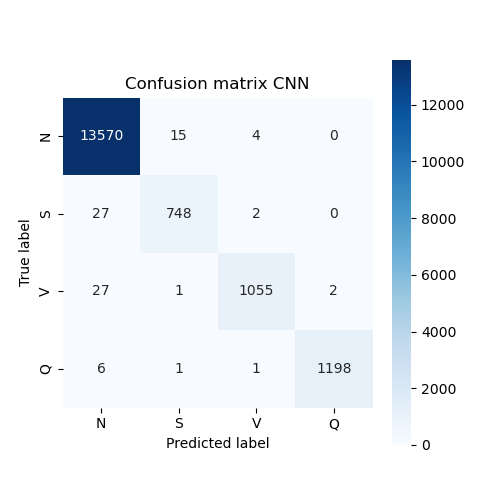

In [10]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_model_1)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [11]:
print(classification_report(y_test, y_pred_model_1, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9956    0.9986    0.9971     13589
                 Artial Premature     0.9778    0.9627    0.9702       777
Premature ventricular contraction     0.9934    0.9724    0.9828      1085
                            Paced     0.9983    0.9934    0.9958      1206

                         accuracy                         0.9948     16657
                        macro avg     0.9913    0.9817    0.9865     16657
                     weighted avg     0.9948    0.9948    0.9948     16657



# Check performance for full dataset

In [12]:
X_full = full_df.iloc[:, :-1]
y_full = full_df.iloc[:, -1]

y_full_nn = pd.get_dummies(y_full, columns=[1])
y_full_nn = y_full_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

In [13]:
# Predict test set labels
y_pred_2  = model_1.predict(X_full)
y_pred_model_2 = np.argmax(y_pred_2 , axis=1)
# Y_full to ndarray and integer
y_full = y_full.astype(int)

print('Accuracy of CNN: ', accuracy_score(y_full, y_pred_model_2))

3471/3471 [==============================] - 27s 8ms/step
Accuracy of CNN:  0.9977396143836171


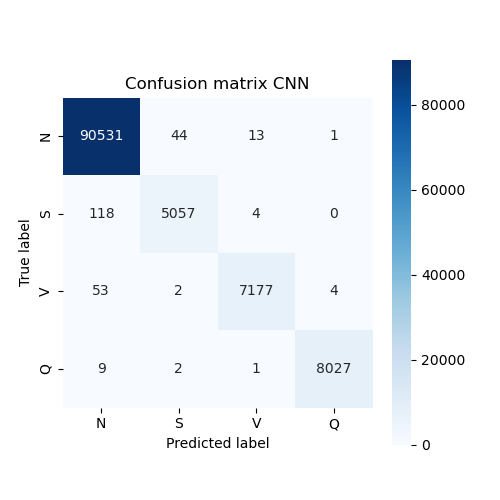

In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_full, y_pred_model_2)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [15]:
print(classification_report(y_full, y_pred_model_2, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9980    0.9994    0.9987     90589
                 Artial Premature     0.9906    0.9764    0.9835      5179
Premature ventricular contraction     0.9975    0.9918    0.9947      7236
                            Paced     0.9994    0.9985    0.9989      8039

                         accuracy                         0.9977    111043
                        macro avg     0.9964    0.9915    0.9939    111043
                     weighted avg     0.9977    0.9977    0.9977    111043

